# Demo

This demo demonstrate how to train various (semi-supervised) Neural NMF models and how to analyze and visualize the result.

In [1]:
# loading packages and functions
import torch
import numpy as np
import scipy.io
import torch.nn as nn
from torch.autograd import Variable
from matplotlib import pyplot as plt
%matplotlib inline
#import Ipynb_importer

import sys
sys.path.insert(1, '../src')
sys.path.insert(1, '../')
#from neural_nmf import Neural_NMF, Energy_Loss_Func, L21_Norm, Recon_Loss_Func
#from lsqnonneg_module import LsqNonneg
#from train import train_unsupervised, train_supervised
#from writer import Writer
from neural_nmf import Neural_NMF, Energy_Loss_Func, L21_Norm, Recon_Loss_Func
from neural_nmf import LsqNonneg
from neural_nmf import train_unsupervised, train_supervised

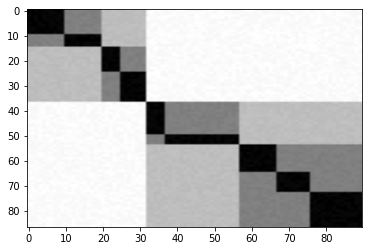

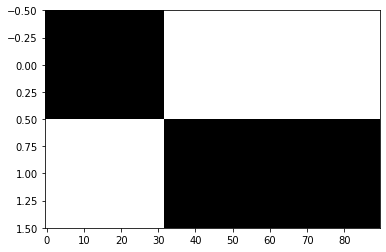

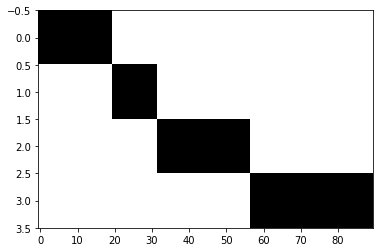

In [2]:
# data loading 
data = scipy.io.loadmat('synthetic_noise.mat')
X = data['X']
X = Variable(torch.from_numpy(X).double())
Y2 = data['Y2']
Y2 = Variable(torch.from_numpy(Y2).double())
Y4 = data['Y4']
Y4 = Variable(torch.from_numpy(Y4).double())
Y9 = data['Y9']
Y9 = Variable(torch.from_numpy(Y9).double())
L0 = data['L0']
L0 = Variable(torch.from_numpy(L0).double())
L10 = data['L10']
L10 = Variable(torch.from_numpy(L10).double())
L20 = data['L20']
L20 = Variable(torch.from_numpy(L20).double())
L30 = data['L30']
L30 = Variable(torch.from_numpy(L30).double())
L40 = data['L40']
L40 = Variable(torch.from_numpy(L40).double())
L50 = data['L50']
L50 = Variable(torch.from_numpy(L50).double())
L60 = data['L60']
L60 = Variable(torch.from_numpy(L60).double())
L70 = data['L70']
L70 = Variable(torch.from_numpy(L70).double())
L80 = data['L80']
L80 = Variable(torch.from_numpy(L80).double())
L90 = data['L90']
L90 = Variable(torch.from_numpy(L90).double())
labels9 = data['labels9']
labels9 = Variable(torch.from_numpy(labels9).long())
labels9 = torch.reshape(labels9,[90])
labels4 = data['labels4']
labels4 = Variable(torch.from_numpy(labels4).long())
labels4 = torch.reshape(labels4,[90])
labels2 = data['labels2']
labels2 = Variable(torch.from_numpy(labels2).long())
labels2 = torch.reshape(labels2,[90])
plt.imshow(X,aspect='auto',cmap='binary')
plt.show()
plt.imshow(Y2,aspect='auto',cmap='binary')
plt.show()
plt.imshow(Y4,aspect='auto',cmap='binary')
plt.show()

In [3]:
# set the network parameters
m = X.shape[0]
k1 = 9
k2 = 4
k3 = 2

## Unsupervised One-Layer

In [4]:
net = Neural_NMF([m, k1])
loss_func = Energy_Loss_Func()
X_input = X
history_unsupervised = train_unsupervised(net, X_input, loss_func, epoch = 10000, lr = 1,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

100%|██████████| 10000/10000 [03:45<00:00, 44.37it/s]


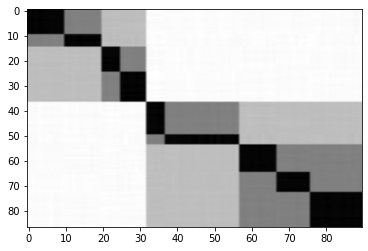

In [5]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()

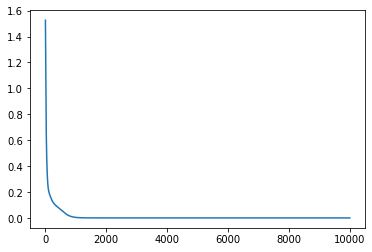

In [6]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

In [17]:
# Reconstruction error

np.linalg.norm(X - A1[-1] @ S1[-1],'fro')/np.linalg.norm(X,'fro')

0.0271338254555369

In [29]:
correct_num = 0
X_approx = A1[-1] @ S1[-1]
for i in range(X.shape[1]):
    display(torch.argmax(X_approx[:,i]))
    display(torch.argmax(X[:,i]))
    if max(X_approx[:,i]) == max(X[:,i]):
        correct_num = correct_num + 1

correct_num

tensor(8)

tensor(4)

tensor(8)

tensor(4)

tensor(8)

tensor(6)

tensor(8)

tensor(4)

tensor(8)

tensor(8)

tensor(8)

tensor(7)

tensor(8)

tensor(8)

tensor(8)

tensor(7)

tensor(8)

tensor(0)

tensor(8)

tensor(4)

tensor(12)

tensor(12)

tensor(12)

tensor(12)

tensor(12)

tensor(13)

tensor(12)

tensor(11)

tensor(12)

tensor(11)

tensor(12)

tensor(12)

tensor(12)

tensor(12)

tensor(12)

tensor(10)

tensor(12)

tensor(12)

tensor(12)

tensor(14)

tensor(21)

tensor(20)

tensor(21)

tensor(24)

tensor(23)

tensor(23)

tensor(21)

tensor(21)

tensor(23)

tensor(23)

tensor(33)

tensor(35)

tensor(33)

tensor(32)

tensor(33)

tensor(31)

tensor(33)

tensor(25)

tensor(33)

tensor(25)

tensor(33)

tensor(30)

tensor(33)

tensor(33)

tensor(42)

tensor(37)

tensor(42)

tensor(39)

tensor(42)

tensor(49)

tensor(42)

tensor(42)

tensor(42)

tensor(42)

tensor(53)

tensor(50)

tensor(53)

tensor(52)

tensor(53)

tensor(51)

tensor(53)

tensor(51)

tensor(53)

tensor(53)

tensor(53)

tensor(52)

tensor(53)

tensor(52)

tensor(53)

tensor(52)

tensor(53)

tensor(53)

tensor(53)

tensor(53)

tensor(53)

tensor(51)

tensor(53)

tensor(53)

tensor(53)

tensor(51)

tensor(53)

tensor(52)

tensor(53)

tensor(53)

tensor(53)

tensor(52)

tensor(53)

tensor(51)

tensor(53)

tensor(51)

tensor(53)

tensor(53)

tensor(53)

tensor(53)

tensor(54)

tensor(60)

tensor(54)

tensor(58)

tensor(54)

tensor(56)

tensor(54)

tensor(55)

tensor(54)

tensor(62)

tensor(54)

tensor(63)

tensor(54)

tensor(62)

tensor(54)

tensor(58)

tensor(54)

tensor(55)

tensor(54)

tensor(62)

tensor(72)

tensor(72)

tensor(72)

tensor(65)

tensor(72)

tensor(71)

tensor(72)

tensor(66)

tensor(72)

tensor(68)

tensor(72)

tensor(67)

tensor(72)

tensor(67)

tensor(72)

tensor(71)

tensor(72)

tensor(71)

tensor(83)

tensor(78)

tensor(83)

tensor(74)

tensor(83)

tensor(76)

tensor(83)

tensor(74)

tensor(83)

tensor(83)

tensor(83)

tensor(76)

tensor(83)

tensor(75)

tensor(83)

tensor(85)

tensor(83)

tensor(79)

tensor(83)

tensor(73)

tensor(83)

tensor(74)

tensor(83)

tensor(83)

tensor(83)

tensor(84)

tensor(83)

tensor(85)

0

## Unsupervised Two-Layer

In [7]:
net = Neural_NMF([m, k1,k2])
X_input = X
history_unsupervised = train_unsupervised(net, X_input, epoch = 10000, lr = 1,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

100%|██████████| 10000/10000 [06:25<00:00, 25.97it/s]


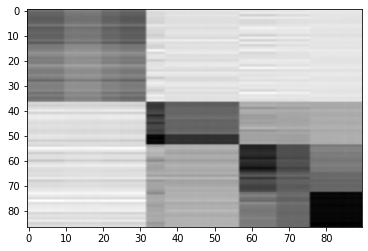

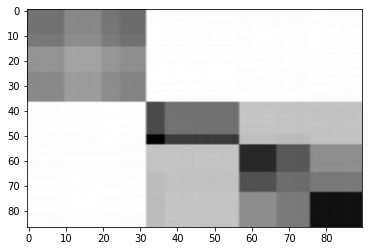

In [8]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
A2 = history_unsupervised.get('A2')
S2 = history_unsupervised.get('S2')
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')

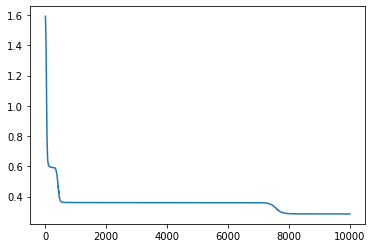

In [9]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

## Unsupervised Three-Layer

In [10]:
net = Neural_NMF([m, k1, k2, k3])
loss_func = Energy_Loss_Func()
X_input = X
history_unsupervised = train_unsupervised(net, X_input, loss_func, epoch = 10000, lr = 1,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

100%|██████████| 10000/10000 [10:40<00:00, 15.62it/s]


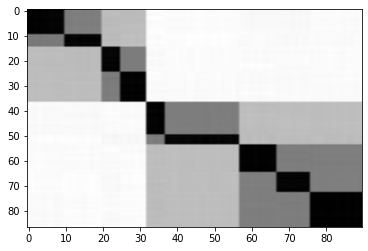

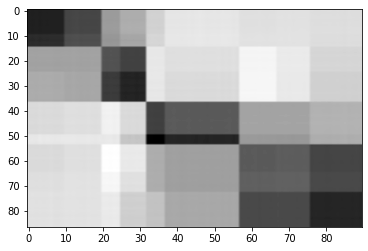

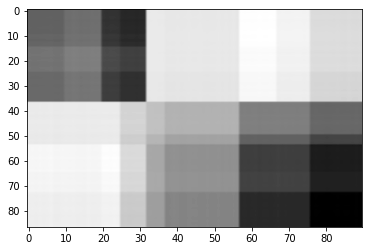

In [11]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
A2 = history_unsupervised.get('A2')
S2 = history_unsupervised.get('S2')
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
A3 = history_unsupervised.get('A3')
S3 = history_unsupervised.get('S3')
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()

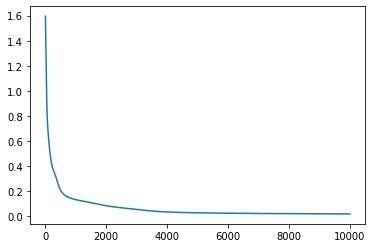

In [12]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

## Supervised One-Layer

In [13]:
# supervised case
c = 9
net = Neural_NMF([m, k1], 9)
net.linear.weight.data = torch.rand(c,k1,dtype = torch.double)
loss_func = Energy_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y9, loss_func = loss_func, epoch = 10000, decay_epoch=100,lr_nmf = 1, lr_classification = 1, weight_decay = 1,verbose_epoch=1000,full_history = True)

AttributeError: 'Neural_NMF' object has no attribute 'linear'

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

In [ ]:
print(X.shape)
print(Y4.shape)
print(k2)

## Supervised Two-Layer

In [ ]:
c = 4
net = Neural_NMF([m, k1, k2], 4)
#net.linear.weight.data = torch.rand(c,k2,dtype = torch.double)
loss_func = Energy_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y4, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=100,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised Three-Layer

In [ ]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Energy_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y2, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised One-Layer (Cross-Entropy)

In [ ]:
# supervised case
c = 9
net = Neural_NMF([m, k1], 9)
loss_func = Energy_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels9, loss_func = loss_func, epoch = 10000, decay_epoch=100,lr_nmf = 1, lr_classification = 1, weight_decay = 1,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised Two-Layer (Cross-Entropy)

In [ ]:
c = 4
net = Neural_NMF([m, k1, k2], 4)
loss_func = Energy_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels4, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised Three-Layer (Cross-Entropy)

In [ ]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Energy_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels2, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Semi-supervised Three-Layer

In [ ]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Recon_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y2, L=L40, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(L40*Y2,aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Semi-supervised Three-Layer (Cross-Entropy)

In [ ]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Recon_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels2, L=L70, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(L70*Y2,aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')